#### Pandas y Valores Faltantes en el la DB "TITANIC dataset"

Queremos saber si los sobrevivientes del RMS Titanic murieron *al azar* o si los sobrevivientes tenían alguna característica distinta de las víctimas de la tragedia. La propuesta es analizarlos para intentar encontrar algunas características que separen a los/as pasajeros/as que sobrevivieron de los/as que no.
### Análisis Exploratorio de Datos

1. Investigar qué forma tienen los datos utilizando las funciones exploratorias que aprendimos. ¿Qué información tenemos en los datos?¿Qué representa cada columna?¿Cuántos pasajeros/as están incluidos/as en este Dataset?
1. ¿Faltan datos? ¿Se te ocurre por qué? ¿Qué harías con ellos?
1. ¿Te parece que todas las columnas son informativas o borrarías alguna?

In [1]:
import pandas as pd

1. Cargar los datos desde el archivo csv.

In [3]:
titanic = pd.read_csv('Titanic.csv',delimiter = ',',encoding = "utf-8")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. ¿Cuántas columnas (features) tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)?.

In [4]:
print(titanic.shape)
print(titanic.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


3. ¿Cuántos valores faltantes hay en cada columna?

In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

4. ¿Cuál o cuáles son las columnas con más valores faltantes?

In [16]:
titanic.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
print(titanic.isna().sum(axis = 0).idxmax()) #PARA OBTENER UNICAMENTE EL MAX

Cabin


In [15]:
print(titanic['Cabin'].isna().sum()) 

687


5. Hacerse alguna pregunta acerca del dataset e intentar responderla. Por ejemplo, ¿cuál es la persona de más edad?

In [19]:
titanic.loc[titanic.Age.idxmax()] #Accediendo a su valor a traves de la edad es lo mismo
                                    #con Iloc que con loc

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

6. ¿cuál es la persona de menor edad?

In [21]:
titanic.loc[titanic.Age.idxmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

#### Trabajando con datos faltantes

Antes de realizar cada una de las siguientes consignas, recordá copiar el dataset en una nueva variable, así mantemos el dataset original sin modificar.

In [22]:
titanic_copia = titanic.copy()

1. Descartar aquellas filas que tengan algún valor faltante. ¿Cuántas instancias quedan en el dataset?

In [23]:
titanic_copia.dropna(inplace = True)
titanic_copia.shape

(183, 12)

2. Descartar aquellas columnas que tengan algún valor faltante. ¿Cuántos y cuáles atributos quedaron?

In [24]:
titanic_copia = titanic.copy()

In [25]:
titanic_copia.dropna(axis = 1, inplace = True)
titanic_copia.shape

(891, 9)

3. Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?

In [30]:
titanic_copia = titanic.copy()
titanic_copia.shape

(891, 12)

In [27]:
titanic_copia.dropna(inplace = True, thresh=3)
titanic_copia.shape

(891, 12)

4. Descartar aquellas columnas que tengan más del 50% de valores faltantes. ¿Cuántos y cuáles atributos quedaron? Luego, descartar las instancias que tengan algún valor faltante.

In [31]:
titanic_copia = titanic.copy()

In [32]:
titanic_copia.dropna(axis = 1, inplace = True, thresh=titanic_copia.shape[0]*0.5)
titanic_copia.shape

(891, 11)

In [33]:
#DESCARTAR INSTANCIAS
titanic_copia.dropna(inplace = True)
titanic_copia.shape

(712, 11)

#### Imputación de Valores Faltantes
1. Calcular el valor medio, moda, mediana y la desviación estándar de la columna `price`.

In [34]:
print(titanic.Age.mean())
print(titanic.Age.mode()[0])
print(titanic.Age.median())
print(titanic.Age.std())

29.69911764705882
24.0
28.0
14.526497332334042


2. Imputar los valores faltantes en la columna `Age` usando su valor medio.

In [35]:
titanic_copia = titanic.copy()

In [36]:
titanic_copia.fillna(titanic.Age.median(), inplace = True)

3. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

Al completar los 177 valores faltantes con la media (28) se ve directamente afectada la
moda(24-->28) y disminuye ligeramente la media (al ser el total mayor de la suma y de N, así mismo pasa con la STD).

In [37]:
print(titanic_copia.Age.mean())
print(titanic_copia.Age.mode()[0])
print(titanic_copia.Age.median())
print(titanic_copia.Age.std())

29.36158249158249
28.0
28.0
13.019696550973201


4. Volver a correr las celdas anteriores, pero completando los valores faltantes con la mediana y luego la moda.

In [38]:
#MEDIANA
titanic_copia = titanic.copy()
titanic_copia.fillna(titanic.Age.mean(), inplace = True)

In [39]:
print(titanic_copia.Age.mean())
print(titanic_copia.Age.mode()[0])
print(titanic_copia.Age.median())
print(titanic_copia.Age.std())

29.69911764705882
29.69911764705882
29.69911764705882
13.002015226002882


In [40]:
#MODA
titanic_copia = titanic.copy()
titanic_copia.fillna(titanic.Age.mode()[0], inplace = True)

In [41]:
print(titanic_copia.Age.mean())
print(titanic_copia.Age.mode()[0])
print(titanic_copia.Age.median())
print(titanic_copia.Age.std())

28.566969696969696
24.0
24.0
13.19957176774647


5. Trabajar con un dataset sin visualizar es muy aburrido y, diríamos, casi frustrante. La próxima clase ya nos meteremos de lleno en visualización. Mientras tanto, intenten hacer un histograma de los puntajes asignados y, luego, de los precios.

In [42]:
import matplotlib.pyplot as plt

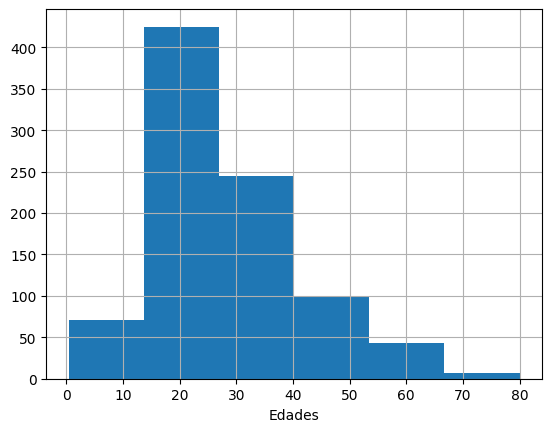

In [43]:
plt.hist(titanic_copia.Age, bins= 6)
plt.xlabel('Edades')
plt.grid()
plt.show()

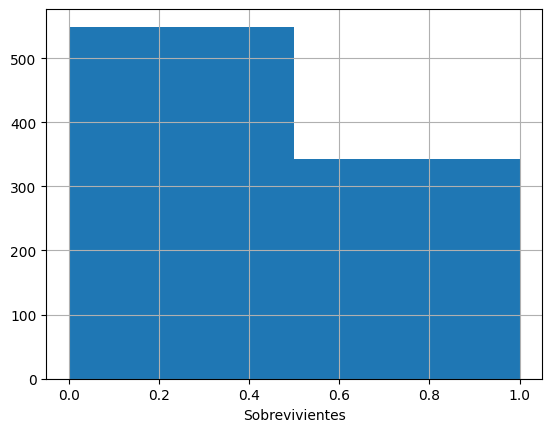

In [44]:
plt.hist(titanic_copia.Survived, bins= 2)#, log = True)
plt.xlabel('Sobrevivientes')
plt.grid()
plt.show()

Consultas extras con tablas dinamicas

In [45]:
print(titanic[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [46]:
print(titanic[['Age','Survived']].groupby(['Age']).mean().sort_values(by='Survived', ascending=False))

       Survived
Age            
0.42        1.0
5.00        1.0
63.00       1.0
53.00       1.0
0.67        1.0
...         ...
28.50       0.0
36.50       0.0
34.50       0.0
20.50       0.0
23.50       0.0

[88 rows x 1 columns]


In [52]:
titanic.fillna(titanic.Age.mean(), inplace = True)

In [53]:
titanic['Rango_Edad'] = pd.cut(titanic['Age'], 5)

In [54]:
print(titanic[['Rango_Edad','Survived']].groupby(['Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

                  Survived
Rango_Edad                
(0.34, 16.336]    0.550000
(48.168, 64.084]  0.434783
(32.252, 48.168]  0.404255
(16.336, 32.252]  0.344168
(64.084, 80.0]    0.090909


In [55]:
print(titanic[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [56]:
print(titanic[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False))

        Survived
Sex             
female  0.742038
male    0.188908


In [57]:
print(titanic[['Cabin','Survived']].groupby(['Cabin']).mean().sort_values(by='Survived', ascending=False))

         Survived
Cabin            
C62 C64       1.0
C126          1.0
C50           1.0
D7            1.0
C47           1.0
...           ...
C118          0.0
C111          0.0
C110          0.0
B94           0.0
T             0.0

[148 rows x 1 columns]


In [58]:
print(titanic[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False))

                   Survived
Embarked                   
29.69911764705882  1.000000
C                  0.553571
Q                  0.389610
S                  0.336957


In [59]:
titanic.fillna(titanic.Embarked.mode(), inplace = True)

In [60]:
print(titanic[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False))

       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000


In [61]:
print(titanic[['Sex','Pclass','Survived']].groupby(['Sex','Pclass']).mean().sort_values(by='Survived', ascending=False))

               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447


In [62]:
print(titanic[['Sex','Rango_Edad','Survived']].groupby(['Sex','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

                         Survived
Sex    Rango_Edad                
female (48.168, 64.084]  0.916667
       (32.252, 48.168]  0.794118
       (16.336, 32.252]  0.716763
       (0.34, 16.336]    0.673469
male   (0.34, 16.336]    0.431373
       (32.252, 48.168]  0.183333
       (48.168, 64.084]  0.177778
       (16.336, 32.252]  0.160000
       (64.084, 80.0]    0.090909
female (64.084, 80.0]         NaN


In [63]:
print(titanic[['Pclass','Rango_Edad','Survived']].groupby(['Pclass','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

                         Survived
Pclass Rango_Edad                
2      (0.34, 16.336]    0.904762
1      (0.34, 16.336]    0.888889
       (32.252, 48.168]  0.681159
       (16.336, 32.252]  0.640449
       (48.168, 64.084]  0.534884
2      (32.252, 48.168]  0.448980
       (16.336, 32.252]  0.421053
3      (0.34, 16.336]    0.400000
2      (48.168, 64.084]  0.352941
3      (16.336, 32.252]  0.244838
1      (64.084, 80.0]    0.166667
3      (48.168, 64.084]  0.111111
       (32.252, 48.168]  0.100000
2      (64.084, 80.0]    0.000000
3      (64.084, 80.0]    0.000000


In [64]:
print(titanic[['Sex','Pclass','Rango_Edad','Survived']].groupby(['Sex','Pclass','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

                                Survived
Sex    Pclass Rango_Edad                
female 1      (32.252, 48.168]  1.000000
       2      (0.34, 16.336]    1.000000
       3      (48.168, 64.084]  1.000000
male   1      (0.34, 16.336]    1.000000
female 1      (16.336, 32.252]  0.975610
              (48.168, 64.084]  0.941176
       2      (16.336, 32.252]  0.921053
              (32.252, 48.168]  0.909091
       1      (0.34, 16.336]    0.833333
       2      (48.168, 64.084]  0.833333
male   2      (0.34, 16.336]    0.818182
female 3      (0.34, 16.336]    0.545455
              (16.336, 32.252]  0.521277
male   1      (32.252, 48.168]  0.435897
              (16.336, 32.252]  0.354167
       3      (0.34, 16.336]    0.270270
       1      (48.168, 64.084]  0.269231
female 3      (32.252, 48.168]  0.250000
male   1      (64.084, 80.0]    0.166667
       3      (16.336, 32.252]  0.138776
       2      (48.168, 64.084]  0.090909
              (16.336, 32.252]  0.087719
              (3

In [65]:
print(titanic[['Sex','Pclass','Rango_Edad','Survived']].groupby(['Sex','Pclass','Rango_Edad']).count().sort_values(by='Survived', ascending=False))

                                Survived
Sex    Pclass Rango_Edad                
male   3      (16.336, 32.252]       245
female 3      (16.336, 32.252]        94
male   2      (16.336, 32.252]        57
       3      (32.252, 48.168]        54
       1      (16.336, 32.252]        48
female 1      (16.336, 32.252]        41
male   1      (32.252, 48.168]        39
female 2      (16.336, 32.252]        38
male   3      (0.34, 16.336]          37
female 3      (0.34, 16.336]          33
       1      (32.252, 48.168]        30
male   2      (32.252, 48.168]        27
       1      (48.168, 64.084]        26
female 2      (32.252, 48.168]        22
       1      (48.168, 64.084]        17
       3      (32.252, 48.168]        16
male   2      (48.168, 64.084]        11
              (0.34, 16.336]          11
female 2      (0.34, 16.336]          10
male   3      (48.168, 64.084]         8
female 2      (48.168, 64.084]         6
male   1      (64.084, 80.0]           6
female 1      (0